<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5 | Notebook 02: EDA

### Carly Sharma, Jake Parker, & Adam Zucker

**CONTENTS:**
- EDA on the final dataframe we created in *Notebook 1*, comprised of California wildfire, weather, and atmospheric carbon data. Our source data was collected from:
    - [Kaggle's](https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv) California Wildfire Incidents dataset
    - [NOAA](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00946/html) Meteorological data
    - Atmospheric carbon data collected by [NOAA/Mauna Loa Observatory](https://www.esrl.noaa.gov/gmd/dv/data/index.php?parameter_name=Carbon%2BDioxide&search=mauna+loa))

**BELOW:** Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---

**Initial EDA**

In [26]:
# Importing our clean dataframe
df = pd.read_csv('../data_clean/true_df.csv')

In [27]:
df.shape

(917, 36)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         917 non-null    object 
 1   county                       917 non-null    object 
 2   latitude                     917 non-null    float64
 3   longitude                    917 non-null    float64
 4   fire_name                    917 non-null    object 
 5   acres_burned                 917 non-null    float64
 6   duration                     863 non-null    float64
 7   started                      917 non-null    object 
 8   extinguished                 863 non-null    object 
 9   pct_contained                914 non-null    float64
 10  major_incident               917 non-null    bool   
 11  admin_unit                   917 non-null    object 
 12  avg_wind_speed               917 non-null    float64
 13  avg_monthly_temp    

---

In [29]:
df.head()

,date,county,latitude,longitude,fire_name,acres_burned,duration,started,extinguished,pct_contained,...,dt32,dx32,dx70,cooling_degree_days,heating_degree_days,elevation,co2_measured_mole_fraction,value_std_dev,co2_number_of_measurements,qc_flag
0,2017-12-01,santa barbara,34.415210,-119.091240,Thomas Fire,281893.0,464.0,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,407.21,0.24,14,pass
1,2017-12-01,santa barbara,34.717960,-120.270770,Drum Fire,14.0,24.0,2017-12-16 12:21:00+00:00,2018-01-09 13:49:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,407.70,0.06,7,pass
2,2017-12-01,santa barbara,34.605358,-120.414875,Coast Fire,14.0,26.0,2017-12-14 12:59:00+00:00,2018-01-09 13:49:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,406.14,0.16,10,pass
3,2017-12-01,ventura,34.415210,-119.091240,Thomas Fire,281893.0,464.0,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,...,7.000000,0.0,16.833333,8.333333,83.916667,23.416667,407.21,0.24,14,pass
4,2017-12-01,riverside,33.965140,-117.476400,Riverdale Fire,40.0,36.0,2017-12-04 12:26:00+00:00,2018-01-09 13:47:00+00:00,100.0,...,2.681818,0.0,17.318182,5.800000,81.227273,12.045455,407.21,0.24,14,pass


In [10]:
# Renaming columns for more clarity
df = df.rename(columns={'county_x': 'county', 'name': 'fire_name', 'adminunit': 'admin_unit', 'acresburned': 'acres_burned', 'percentcontained': 'pct_contained',
                       'majorincident': 'major_incident', 'time': 'date', 'value': 'co2_measured_mole_fraction', 'nvalue': 'co2_number_of_measurements',
                       'qcflag': 'qc_flag', 'awnd': 'avg_wind_speed', 'cldd': 'cooling_degree_days', 'emnt': 'extreme_min_temp', 'emsn': 'highest_daily_snowfall',
                       'emxp': 'highest_daily_precipitation', 'emxt': 'extreme_max_temp', 'htdd': 'heating_degree_days', 'prcp': 'total_monthly_precipitation',
                       'snow': 'total_monthly_snowfall', 'tavg': 'avg_monthly_temp', 'tmax': 'min_monthly_temp', 'tmin': 'max_monthly_temp'})

In [11]:
df.columns

Index(['county', 'latitude', 'longitude', 'admin_unit', 'fire_name',
       'acres_burned', 'started', 'extinguished', 'duration', 'pct_contained',
       'major_incident', 'date', 'co2_measured_mole_fraction', 'value_std_dev',
       'co2_number_of_measurements', 'qc_flag', 'elevation', 'avg_wind_speed',
       'cooling_degree_days', 'dp01', 'dp10', 'dsnd', 'dt00', 'dt32', 'dx32',
       'dx70', 'extreme_min_temp', 'highest_daily_snowfall',
       'highest_daily_precipitation', 'extreme_max_temp',
       'heating_degree_days', 'total_monthly_precipitation',
       'total_monthly_snowfall', 'avg_monthly_temp', 'min_monthly_temp',
       'max_monthly_temp'],
      dtype='object')

In [12]:
# Sorting columns for more clarity
df = df[['date', 'county', 'latitude', 'longitude', 'fire_name', 'acres_burned', 'duration', 'started', 'extinguished', 'pct_contained', 'major_incident',
        'admin_unit', 'avg_wind_speed', 'avg_monthly_temp', 'max_monthly_temp', 'extreme_max_temp', 'min_monthly_temp', 'extreme_min_temp', 
        'total_monthly_precipitation', 'highest_daily_precipitation', 'total_monthly_snowfall', 'highest_daily_snowfall', 'dsnd', 'dp01', 'dp10', 'dt00', 
        'dt32', 'dx32', 'dx70', 'cooling_degree_days', 'heating_degree_days', 'elevation', 'co2_measured_mole_fraction', 'value_std_dev',
        'co2_number_of_measurements', 'qc_flag']]

In [13]:
df.head()

,date,county,latitude,longitude,fire_name,acres_burned,duration,started,extinguished,pct_contained,...,dt32,dx32,dx70,cooling_degree_days,heating_degree_days,elevation,co2_measured_mole_fraction,value_std_dev,co2_number_of_measurements,qc_flag
0,2017-12-01,santa barbara,34.415210,-119.091240,Thomas Fire,281893.0,464 days 16:56:00,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,407.21,0.24,14,pass
1,2017-12-01,santa barbara,34.717960,-120.270770,Drum Fire,14.0,24 days 01:28:00,2017-12-16 12:21:00+00:00,2018-01-09 13:49:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,407.70,0.06,7,pass
2,2017-12-01,santa barbara,34.605358,-120.414875,Coast Fire,14.0,26 days 00:50:00,2017-12-14 12:59:00+00:00,2018-01-09 13:49:00+00:00,100.0,...,3.692308,0.0,15.692308,3.700000,81.153846,12.153846,406.14,0.16,10,pass
3,2017-12-01,ventura,34.415210,-119.091240,Thomas Fire,281893.0,464 days 16:56:00,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,...,7.000000,0.0,16.833333,8.333333,83.916667,23.416667,407.21,0.24,14,pass
4,2017-12-01,riverside,33.965140,-117.476400,Riverdale Fire,40.0,36 days 01:21:00,2017-12-04 12:26:00+00:00,2018-01-09 13:47:00+00:00,100.0,...,2.681818,0.0,17.318182,5.800000,81.227273,12.045455,407.21,0.24,14,pass


In [14]:
df[df['acres_burned'].isna()]

,date,county,latitude,longitude,fire_name,acres_burned,duration,started,extinguished,pct_contained,...,dt32,dx32,dx70,cooling_degree_days,heating_degree_days,elevation,co2_measured_mole_fraction,value_std_dev,co2_number_of_measurements,qc_flag
688,2019-10-01,riverside,33.451480,-116.058980,Johnson Fire,NaN,NaN,2019-10-14 15:32:20+00:00,NaN,NaN,...,0.363636,0.0,28.090909,6.225,93.954545,153.363636,408.46,0.09,15,pass
709,2019-11-01,yolo,38.734634,-121.729691,Cashe Fire,NaN,NaN,2019-11-25 12:02:02+00:00,NaN,NaN,...,1.666667,0.0,20.333333,NaN,82.666667,0.333333,410.46,0.11,14,pass
745,2019-10-01,san diego,33.351145,-117.403719,Oak Fire,NaN,NaN,2019-10-22 19:20:44+00:00,NaN,NaN,...,0.864865,0.0,26.702703,5.325,91.108108,81.810811,409.09,0.14,9,pass


In [15]:
df.isnull().sum()

date                             0
county                           0
latitude                         0
longitude                        0
fire_name                        0
acres_burned                     3
duration                        54
started                          0
extinguished                    54
pct_contained                    3
major_incident                   0
admin_unit                       0
avg_wind_speed                   0
avg_monthly_temp                 2
max_monthly_temp                 4
extreme_max_temp                 0
min_monthly_temp                 4
extreme_min_temp                 4
total_monthly_precipitation      4
highest_daily_precipitation      2
total_monthly_snowfall           0
highest_daily_snowfall           4
dsnd                            68
dp01                             0
dp10                             0
dt00                             4
dt32                             4
dx32                             4
dx70                

In [16]:
dummies = df[['county', 'fire_name', 'major_incident', 'admin_unit', 'qc_flag']]

In [17]:
df2 = pd.get_dummies(data=dummies, drop_first=True)

In [18]:
dummy_df = pd.concat([df, df2], axis=1)

In [19]:
dummy_df = dummy_df.drop(columns=['county', 'fire_name', 'major_incident', 'admin_unit', 'qc_flag'])

In [20]:
dummy_df.head()

,date,latitude,longitude,acres_burned,duration,started,extinguished,pct_contained,avg_wind_speed,avg_monthly_temp,...,admin_unit_Vallejo City Fire Department,admin_unit_Vallejo city fire,admin_unit_Ventura County Fire,admin_unit_Ventura County Fire Department,admin_unit_Ventura County Fire Department,admin_unit_Ventura County Fire Dept. and Los Angeles County Fire Dept.,admin_unit_Wheatland Fire Protection District,admin_unit_Yolo County Fire Protection District,admin_unit_Yosemite National Forest,admin_unit_Yosemite National Park
0,2017-12-01,34.415210,-119.091240,281893.0,464 days 16:56:00,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,222.547059,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,34.717960,-120.270770,14.0,24 days 01:28:00,2017-12-16 12:21:00+00:00,2018-01-09 13:49:00+00:00,100.0,222.547059,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-01,34.605358,-120.414875,14.0,26 days 00:50:00,2017-12-14 12:59:00+00:00,2018-01-09 13:49:00+00:00,100.0,222.547059,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-12-01,34.415210,-119.091240,281893.0,464 days 16:56:00,2017-12-04 18:28:00+00:00,2019-03-14 11:24:00+00:00,100.0,446.005556,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-01,33.965140,-117.476400,40.0,36 days 01:21:00,2017-12-04 12:26:00+00:00,2018-01-09 13:47:00+00:00,100.0,534.661905,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dummy_df.to_csv('../data_clean/dummy_df.csv', index=False)

---

In [22]:
dummy_df.corr()

,latitude,longitude,acres_burned,pct_contained,avg_wind_speed,avg_monthly_temp,max_monthly_temp,extreme_max_temp,min_monthly_temp,extreme_min_temp,...,admin_unit_Vallejo City Fire Department,admin_unit_Vallejo city fire,admin_unit_Ventura County Fire,admin_unit_Ventura County Fire Department,admin_unit_Ventura County Fire Department,admin_unit_Ventura County Fire Dept. and Los Angeles County Fire Dept.,admin_unit_Wheatland Fire Protection District,admin_unit_Yolo County Fire Protection District,admin_unit_Yosemite National Forest,admin_unit_Yosemite National Park
latitude,1.000000,-0.356645,0.032495,NaN,0.119112,-0.050955,-0.010062,0.086515,-0.030380,0.011728,...,0.005909,0.005897,-0.010837,-0.022727,-0.015835,-0.016063,0.010211,0.008876,0.003973,0.003496
longitude,-0.356645,1.000000,-0.024765,NaN,0.012340,0.133805,0.010094,-0.006490,0.022239,0.005897,...,-0.008337,-0.008323,-0.000938,-0.000107,-0.000576,0.000851,-0.006259,-0.007070,-0.001721,-0.001670
acres_burned,0.032495,-0.024765,1.000000,NaN,-0.015629,-0.015938,0.040355,-0.013577,0.021933,0.060677,...,-0.005576,-0.005478,-0.005530,-0.010222,-0.000908,0.125823,-0.005589,NaN,0.002278,0.001212
pct_contained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_wind_speed,0.119112,0.012340,-0.015629,NaN,1.000000,0.154115,-0.038997,0.125441,-0.112020,0.003376,...,-0.029640,-0.029640,-0.010882,-0.020912,-0.014525,-0.014185,-0.006688,-0.047100,0.044265,0.044265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
admin_unit_Ventura County Fire Dept. and Los Angeles County Fire Dept.,-0.016063,0.000851,0.125823,NaN,-0.014185,-0.005477,-0.064103,0.088715,-0.060678,-0.059623,...,-0.001545,-0.001545,-0.001545,-0.003095,-0.002186,1.000000,-0.001545,-0.001545,-0.001545,-0.001545
admin_unit_Wheatland Fire Protection District,0.010211,-0.006259,-0.005589,NaN,-0.006688,-0.003871,-0.007158,-0.006566,-0.004158,-0.013448,...,-0.001092,-0.001092,-0.001092,-0.002187,-0.001545,-0.001545,1.000000,-0.001092,-0.001092,-0.001092
admin_unit_Yolo County Fire Protection District,0.008876,-0.007070,NaN,NaN,-0.047100,-0.003871,-0.046069,0.023603,-0.055934,-0.044227,...,-0.001092,-0.001092,-0.001092,-0.002187,-0.001545,-0.001545,-0.001092,1.000000,-0.001092,-0.001092
admin_unit_Yosemite National Forest,0.003973,-0.001721,0.002278,NaN,0.044265,-0.003871,0.005879,0.007115,0.013338,0.002444,...,-0.001092,-0.001092,-0.001092,-0.002187,-0.001545,-0.001545,-0.001092,-0.001092,1.000000,-0.001092


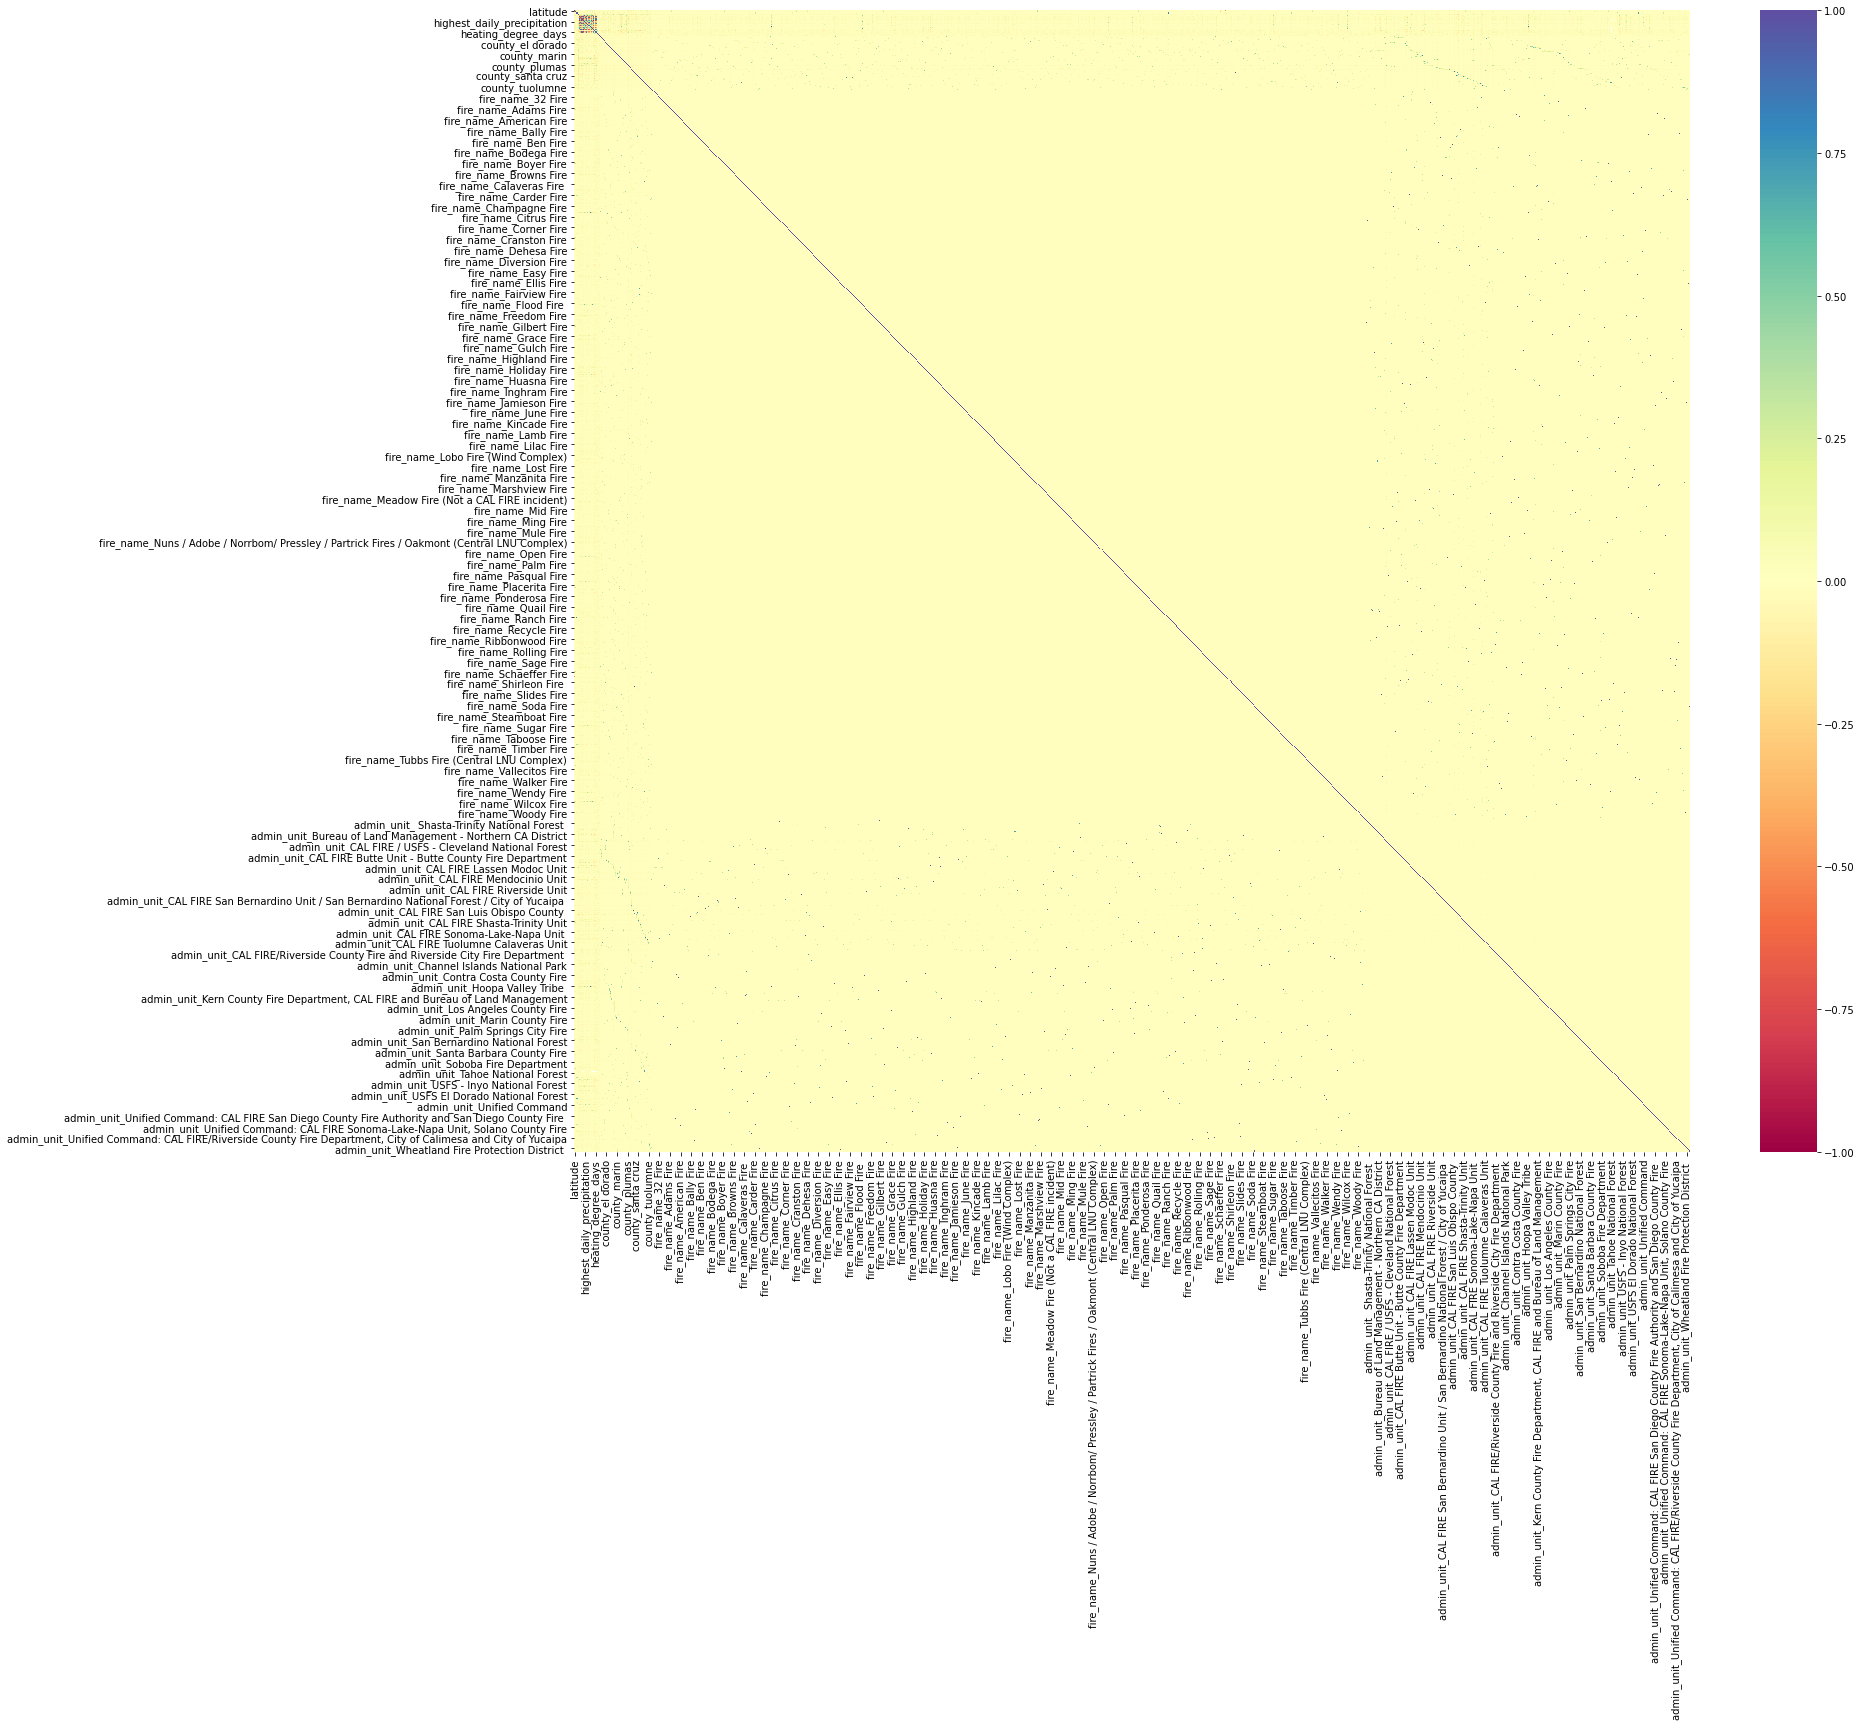

In [23]:
plt.figure(figsize=(25, 21))
sns.heatmap(dummy_df.drop(columns=['date', 'duration', 'started', 'extinguished']).corr(), vmin=-1, vmax=1, cmap='Spectral');

In [24]:
df.corr()

,latitude,longitude,acres_burned,pct_contained,major_incident,avg_wind_speed,avg_monthly_temp,max_monthly_temp,extreme_max_temp,min_monthly_temp,...,dt00,dt32,dx32,dx70,cooling_degree_days,heating_degree_days,elevation,co2_measured_mole_fraction,value_std_dev,co2_number_of_measurements
latitude,1.000000,-0.356645,0.032495,NaN,0.044652,0.119112,-0.050955,-0.010062,0.086515,-0.030380,...,-0.052747,0.016267,-0.080817,-0.016257,-0.089486,-0.029726,-0.027552,-0.032726,0.043246,0.026824
longitude,-0.356645,1.000000,-0.024765,NaN,-0.042148,0.012340,0.133805,0.010094,-0.006490,0.022239,...,0.107926,0.042193,0.167601,-0.007714,0.033064,0.015436,0.050962,0.005404,-0.020772,0.025795
acres_burned,0.032495,-0.024765,1.000000,NaN,0.259286,-0.015629,-0.015938,0.040355,-0.013577,0.021933,...,-0.006950,0.012427,-0.012314,0.011587,-0.124375,0.010858,0.033140,-0.056914,0.033821,0.074355
pct_contained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_incident,0.044652,-0.042148,0.259286,NaN,1.000000,-0.050700,-0.033420,0.022827,0.059929,0.008248,...,-0.021175,-0.006548,0.004153,0.007494,-0.155072,0.006156,0.013528,-0.174702,0.054047,-0.010803
avg_wind_speed,0.119112,0.012340,-0.015629,NaN,-0.050700,1.000000,0.154115,-0.038997,0.125441,-0.112020,...,0.146259,0.297882,0.099235,-0.040997,-0.194470,-0.179487,-0.033898,-0.076816,-0.037752,-0.020278
avg_monthly_temp,-0.050955,0.133805,-0.015938,NaN,-0.033420,0.154115,1.000000,-0.306092,0.319680,-0.304166,...,0.411554,0.562725,0.701226,-0.368493,-0.031410,-0.289111,-0.143905,0.061378,0.016647,0.039892
max_monthly_temp,-0.010062,0.010094,0.040355,NaN,0.022827,-0.038997,-0.306092,1.000000,-0.524339,0.973309,...,-0.146957,-0.589851,-0.244484,0.893969,0.090802,0.903569,0.901714,-0.042295,0.039979,-0.017538
extreme_max_temp,0.086515,-0.006490,-0.013577,NaN,0.059929,0.125441,0.319680,-0.524339,1.000000,-0.500096,...,0.239977,0.392127,0.137492,-0.633962,-0.143349,-0.459920,-0.339249,-0.061110,-0.011794,-0.069316
min_monthly_temp,-0.030380,0.022239,0.021933,NaN,0.008248,-0.112020,-0.304166,0.973309,-0.500096,1.000000,...,-0.148840,-0.615910,-0.238947,0.858897,0.128728,0.889550,0.940493,-0.031575,0.031313,-0.027044


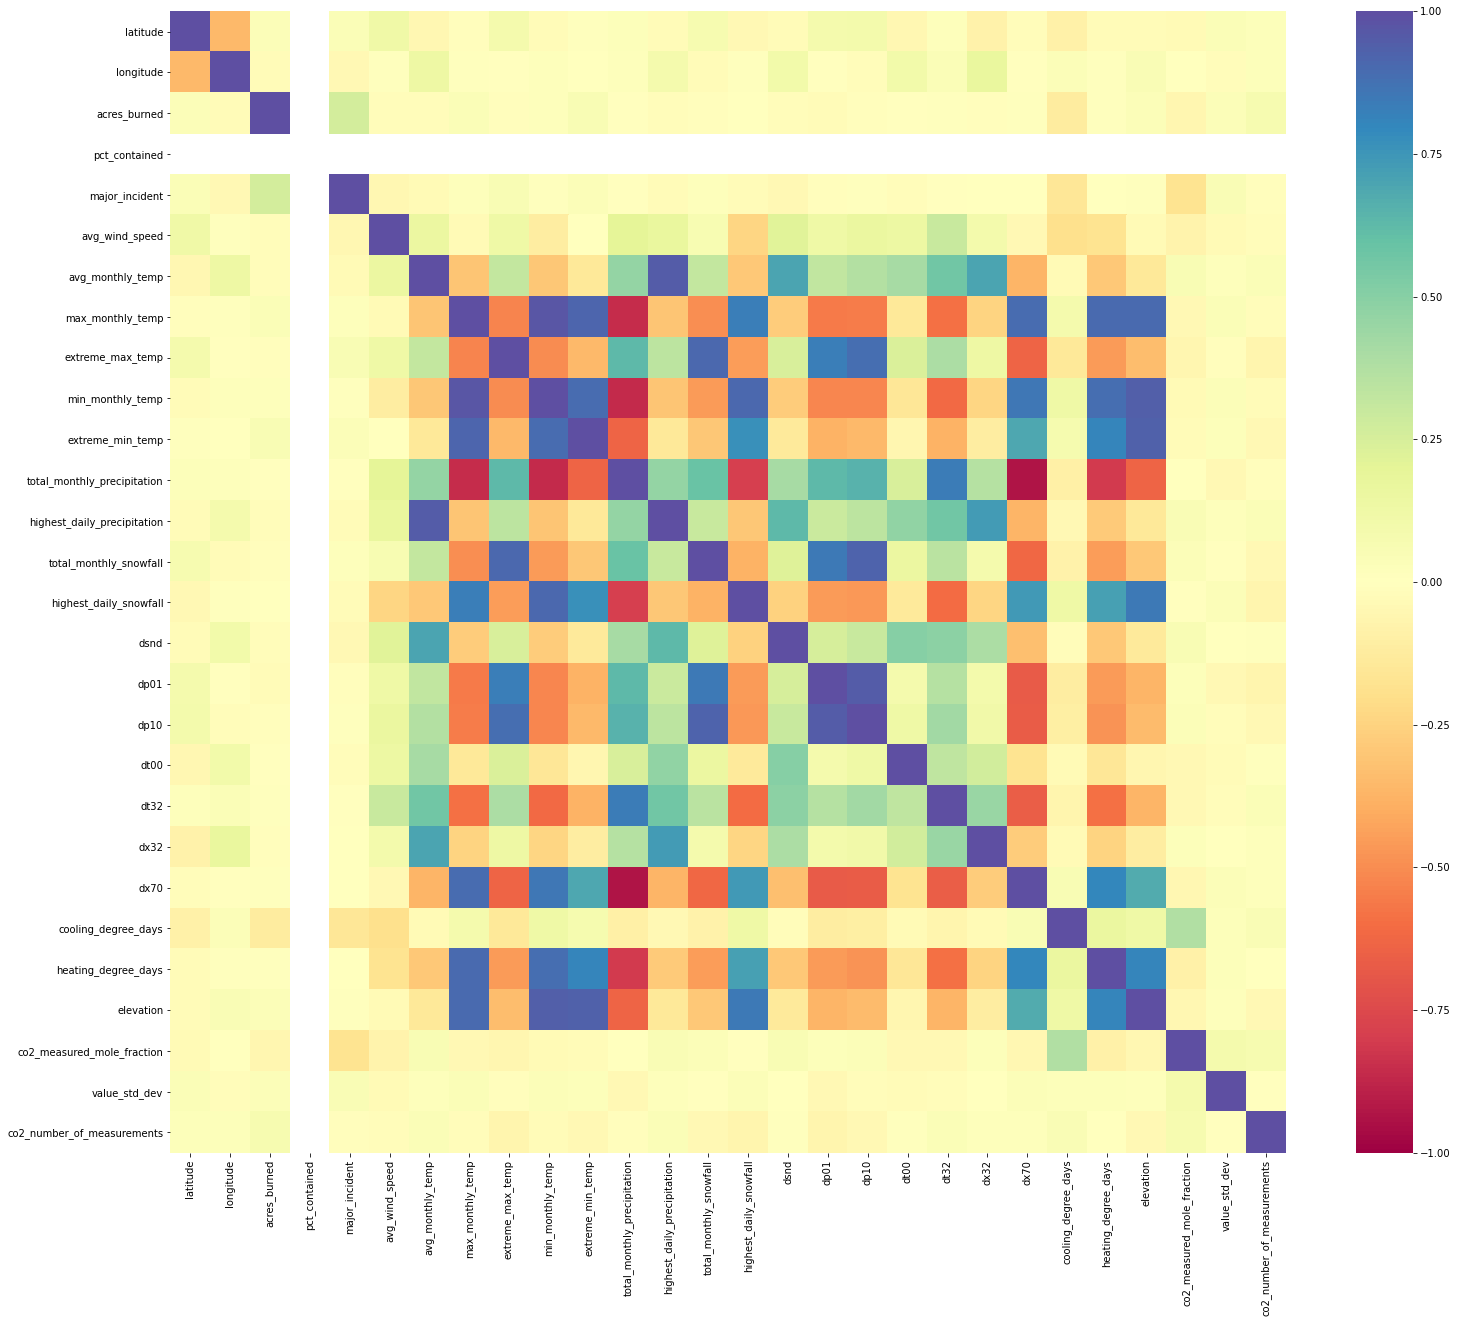

In [25]:
plt.figure(figsize=(25, 21))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='Spectral');